In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.ticker as ticker

In [3]:
model = tf.keras.models.load_model('unet-resnet-102030.h5', compile=True)

In [4]:
field_stack = np.load('./field_example/field_stack.npy')
print(field_stack.shape)
nt = 1248
dt = 3 #ms

(3, 1248)


In [5]:
corrected = np.zeros((nt,3))
   
near = field_stack[0, :]
mid = field_stack[1, :]
far = field_stack[2, :]

before = np.stack((near, mid, far), axis=1)
before = np.reshape(before, (1, nt, 3, 1))

predict = model.predict(before, verbose=False)
predict = predict[0,:,:]

corrected[:,0] = predict[:,0]
corrected[:,1] = predict[:,1]
corrected[:,2] = predict[:,2]

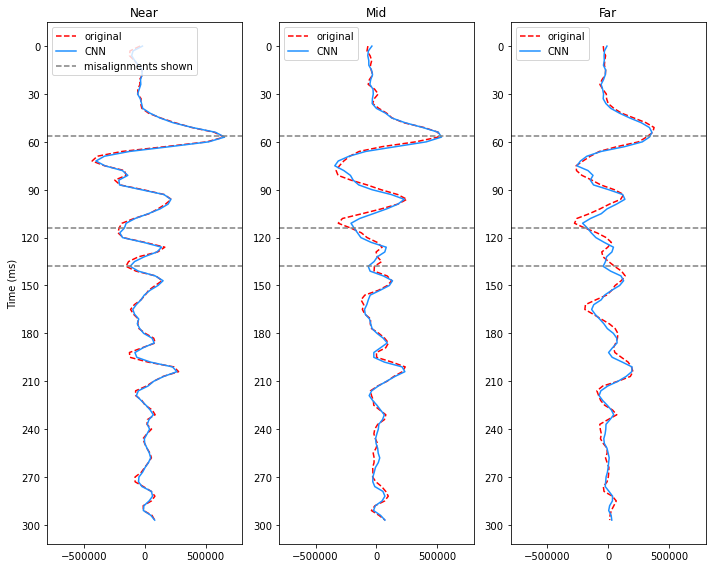

In [17]:
mi = 600
ma = 700

%matplotlib inline
fig,ax = plt.subplots(1,3,figsize=(10,8))
custom_xlim = (-0.8e6, 0.8e6)
plt.setp(ax, xlim=custom_xlim)

yticks_time = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format((y-mi)*dt))

line1 = 618.8
line2 = 638
line3 = 646

ax[0].plot(field_stack[0,mi:ma], range(mi,ma), 'r--', label='original')
ax[0].plot(corrected[mi:ma,0], range(mi,ma), label='CNN', color='dodgerblue')
ax[0].invert_yaxis()
ax[0].set_title('Near')
ax[0].hlines(line1, -1e6, 1e6, color='grey', ls='--', label='misalignments shown')
ax[0].hlines(line2, -1e6, 1e6, color='grey', ls='--')
ax[0].hlines(line3, -1e6, 1e6, color='grey', ls='--')
ax[0].legend(loc='upper left')
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(10)) 
ax[0].yaxis.set_major_formatter(yticks_time)
ax[0].set_ylabel('Time (ms)')


ax[1].plot(field_stack[1,mi:ma], range(mi,ma), 'r--', label='original')
ax[1].plot(corrected[mi:ma,1], range(mi,ma), label='CNN', color='dodgerblue')
ax[1].invert_yaxis()
ax[1].legend(loc='upper left')
ax[1].set_title('Mid')
ax[1].hlines(line1, -1e6, 1e6, color='grey', ls='--')
ax[1].hlines(line2, -1e6, 1e6, color='grey', ls='--')
ax[1].hlines(line3, -1e6, 1e6, color='grey', ls='--')
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(10)) 
ax[1].yaxis.set_major_formatter(yticks_time)

ax[2].plot(field_stack[2,mi:ma], range(mi,ma), 'r--', label='original')
ax[2].plot(corrected[mi:ma,2], range(mi,ma), label='CNN', color='dodgerblue')
ax[2].invert_yaxis()
ax[2].legend(loc='upper left')
ax[2].set_title('Far')
ax[2].hlines(line1, -1e6, 1e6, color='grey', ls='--')
ax[2].hlines(line2, -1e6, 1e6, color='grey', ls='--')
ax[2].hlines(line3, -1e6, 1e6, color='grey', ls='--')
ax[2].yaxis.set_major_locator(ticker.MultipleLocator(10)) 
ax[2].yaxis.set_major_formatter(yticks_time)

plt.tight_layout()